# Sorting algorithms

The most intuitive algorithm is bubble sort. You compare every pair of items in the list, and if the one that comes later is smaller than the one that comes earlier, you swap their locations.

When we are talking about computational complexity, what we mean is: if I have to run the algorithm for a list of size N, can I say how much time will it take, broadly speaking. 

In [2]:
import numpy as np

In [4]:
def bubble_sort(numbers):
    
    for iter_num in range(len(numbers)-1,0,-1):
        change = 0
        for idx in range(iter_num):
            if numbers[idx]>numbers[idx+1]:
                temp = numbers[idx]
                numbers[idx] = numbers[idx+1]
                numbers[idx+1] = temp
                change = 1
#            print(iter_num,idx,numbers, change)
#        print(' ')
#        if(change==0):
#            break      
    return numbers


In [5]:
numbers = list(np.random.randint(1,100,20))
print(numbers)
print(bubble_sort(numbers))

[65, 99, 44, 99, 66, 78, 87, 91, 46, 80, 71, 72, 10, 61, 74, 57, 90, 34, 47, 31]
[10, 31, 34, 44, 46, 47, 57, 61, 65, 66, 71, 72, 74, 78, 80, 87, 90, 91, 99, 99]


Can you plot a graph showing how bubble sort's computational requirements increase as the size of the list increases?

### Merge sort

A more complex, but efficient algorithm, is merge sort. The basic idea here is that it is always easier to merge arrays than to sort them. So we break the original list up into halves, and those halves into halves, and so on until we come across a set of lists with just one element each. These lists are already sorted, so we just string them back together in the correct sequence to sort the whole big list. 

In [18]:
def merge(left,right):

    result = []
    while len(left) != 0 and len(right) != 0:
        if left[0] < right[0]:
            result.append(left[0])
            left.remove(left[0])
        else:
            result.append(right[0])
            right.remove(right[0])
        print(result)
    if len(left) == 0:
        result = result + right
    else:
        result = result + left
    return result

In [20]:
merge([0,3,5,7,9], [1,2,4,6,8,10])

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
def merge_sort(numbers):
    if len(numbers) <= 1:
        return numbers
    middle = len(numbers) // 2
    left = numbers[:middle]
    right = numbers[middle:]

    left = merge_sort(left)
    right = merge_sort(right)
    return list(merge(left, right))

In [26]:
numbers = list(np.random.randint(1,100,20))
print(merge_sort(numbers))

[38]
[10]
[10]
[10, 20]
[10]
[10, 20]
[10, 20, 38]
[10, 20, 38, 54]
[34]
[10]
[10]
[10, 15]
[10]
[10, 15]
[10, 15, 34]
[10, 15, 34, 39]
[10]
[10, 10]
[10, 10, 15]
[10, 10, 15, 20]
[10, 10, 15, 20, 34]
[10, 10, 15, 20, 34, 38]
[10, 10, 15, 20, 34, 38, 39]
[10, 10, 15, 20, 34, 38, 39, 54]
[10, 10, 15, 20, 34, 38, 39, 54, 79]
[2]
[20]
[20]
[20, 33]
[2]
[2, 20]
[2, 20, 33]
[2, 20, 33, 56]
[30]
[5]
[5]
[5, 29]
[5]
[5, 29]
[5, 29, 30]
[5, 29, 30, 59]
[2]
[2, 5]
[2, 5, 20]
[2, 5, 20, 29]
[2, 5, 20, 29, 30]
[2, 5, 20, 29, 30, 33]
[2, 5, 20, 29, 30, 33, 56]
[2, 5, 20, 29, 30, 33, 56, 59]
[2, 5, 20, 29, 30, 33, 56, 59, 60]
[2]
[2, 5]
[2, 5, 10]
[2, 5, 10, 10]
[2, 5, 10, 10, 15]
[2, 5, 10, 10, 15, 20]
[2, 5, 10, 10, 15, 20, 20]
[2, 5, 10, 10, 15, 20, 20, 29]
[2, 5, 10, 10, 15, 20, 20, 29, 30]
[2, 5, 10, 10, 15, 20, 20, 29, 30, 33]
[2, 5, 10, 10, 15, 20, 20, 29, 30, 33, 34]
[2, 5, 10, 10, 15, 20, 20, 29, 30, 33, 34, 38]
[2, 5, 10, 10, 15, 20, 20, 29, 30, 33, 34, 38, 39]
[2, 5, 10, 10, 15, 20, 20, 

Merge sort has a computational complexity of $O(n \log(n))$ as opposed to bubble sort, which has a complexity of $O(n^2)$. But does it really work much better? 

Why don't you compare the performance of bubble sort and merge sort quantitatively? 

### Insertion sort

In a very common use case - sorting data that is nearly sorted - merge sort does terribly. The best algorithm for such settings is insertion sort. The idea is to iterate through the list, and whenever you find a number smaller than its predecessor, also looking at whether it is smaller than any of the earlier numbers. Then we move this number back such that it is larger than the number it succeeds in its new location. 

In [14]:
def insertion_sort(numbers):     
    for i in range(1, len(numbers)): 
        key = numbers[i]         
        j = i-1
        while j >= 0 and key < numbers[j]: 
                numbers[j + 1] = numbers[j] 
                j -= 1
        numbers[j + 1] = key
        print(numbers)
    return numbers

In [15]:
def insertion_sort_cnt(numbers):  
    cnt = 0
    for i in range(1, len(numbers)): 
        key = numbers[i]         
        j = i-1
        while j >= 0 and key < numbers[j]: 
            cnt = cnt + 1
            numbers[j + 1] = numbers[j] 
            j -= 1
        numbers[j + 1] = key
       # print(numbers)
    return cnt

In [32]:
numbers = list(np.random.randint(1,100,20))
print(insertion_sort(numbers))

[19, 41, 75, 9, 53, 5, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[19, 41, 75, 9, 53, 5, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[9, 19, 41, 75, 53, 5, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[9, 19, 41, 53, 75, 5, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 19, 41, 53, 75, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 19, 41, 53, 75, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 19, 41, 53, 75, 83, 92, 33, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 19, 33, 41, 53, 75, 83, 92, 84, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 19, 33, 41, 53, 75, 83, 84, 92, 41, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 19, 33, 41, 41, 53, 75, 83, 84, 92, 16, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 16, 19, 33, 41, 41, 53, 75, 83, 84, 92, 68, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 16, 19, 33, 41, 41, 53, 68, 75, 83, 84, 92, 27, 14, 65, 50, 31, 58, 2]
[5, 9, 16, 19, 27, 33, 41, 41, 53, 68, 75, 83, 84, 92, 14, 65, 5

Why don't you compare the performance of all three algorithms quantitatively and tell me which one you like best?

In [16]:
import matplotlib.pyplot as plt
                 
                    
    

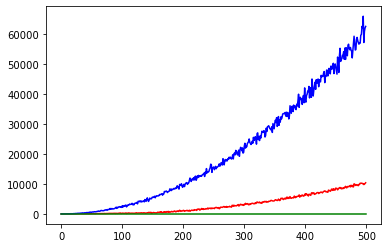

In [29]:
def almost_sort(n):
    als = [i  for i in range(n)]
    if(n==10):
        for j in range(5,8):
            als[j] = np.random.randint(1,100,1)
    else :
        for j in range(int(n/2),int(n/2)+int(n/10)):
            als[j] = np.random.randint(1,100,1)
    return als        
            
    
x = []
y_almost = []
z_random = []
l = []
for m in range(500):
    x.append (m)
    y_almost.append(insertion_sort_cnt(almost_sort(m)))
    z_random.append((insertion_sort_cnt(list(np.random.randint(1,100,m)))))
    l.append(insertion_sort_cnt([ll for ll in range(m)]))
                    

plt.plot(x,y_almost,color = 'red')
plt.plot(x,z_random,color = 'blue')
plt.plot(x,l,color = 'green')
plt.show()   

In [2]:
[i  for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
list(np.random.randint(1,100,10))

[54, 45, 74, 81, 37, 77, 65, 64, 60, 91]

In [4]:
range(7,10)

range(7, 10)

In [8]:
n = 50
n/2+n/10

30.0

In [7]:
n%10

0

In [23]:
a = list(np.random.randint(1,100,5))
print(a)
for i in range(1,len(a)):
    key = a[i]
    j = i-1
    print(key)
    while j >=0 and key < a[j]:
        #temp  = a[j+1]
        a[j+1] = a[j]
        j=j-1
    a[j+1]  = key    
       
print(a)    
    


[59, 3, 64, 45, 75]
3
64
45
75
[3, 45, 59, 64, 75]
